In [17]:
import pandas as pd
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Читаем файл с данными, в которых записаны суточные данные измерений foF2, моделей IRTAM и IRI 

In [18]:
fof2 = pd.read_csv('SMJ67.txt', parse_dates=True,header=0,sep=r'\s*',index_col='Time')

In [19]:
fof2.head()


,Obs,IRTAM,IRI,DifIRTAM,DifIRI,Expand,DifExp,conf
Time,,,,,,,,
20020208_00:00,6.53,5.20,4.83,1.34,1.71,6.44,0.09,42
20020207_00:15,6.45,5.11,4.76,1.34,1.69,6.25,0.20,100
20020207_00:30,6.30,5.03,4.70,1.27,1.60,6.07,0.23,100
20020207_00:45,6.35,4.97,4.65,1.38,1.70,5.91,0.44,100
20020207_01:00,5.80,4.92,4.61,0.88,1.19,5.78,0.02,100


Дата и время не распознались, поэтому сгенерируем нужные нам дату и время вручную:

In [20]:
dTime=pd.date_range('2002-02-07',periods=96,freq='15min')
dTime[:3] # 3 первые строки

DatetimeIndex(['2002-02-07 00:00:00', '2002-02-07 00:15:00',
               '2002-02-07 00:30:00'],
              dtype='datetime64[ns]', freq='15T', tz=None)

теперь заменяем индексы на сгенерированные нами даты:

In [21]:
fof2.index=dTime
fof2.head()

,Obs,IRTAM,IRI,DifIRTAM,DifIRI,Expand,DifExp,conf
2002-02-07 00:00:00,6.53,5.20,4.83,1.34,1.71,6.44,0.09,42
2002-02-07 00:15:00,6.45,5.11,4.76,1.34,1.69,6.25,0.20,100
2002-02-07 00:30:00,6.30,5.03,4.70,1.27,1.60,6.07,0.23,100
2002-02-07 00:45:00,6.35,4.97,4.65,1.38,1.70,5.91,0.44,100
2002-02-07 01:00:00,5.80,4.92,4.61,0.88,1.19,5.78,0.02,100


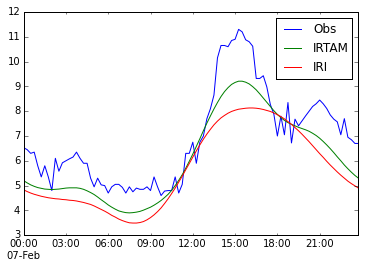

In [29]:
fof2['Obs'].plot()
fof2['IRTAM'].plot()
fof2['IRI'].plot()
legend()

In [23]:
# среднее по столбцу Obs
fof2['Obs'].mean()


6.909166666666668

In [24]:
fof2['Obs'].median() # а это медиана

6.49

Создаем DataFrame в 24 строки, индексируем по дате и времени + столбец с данными

In [66]:
ObsM = pd.DataFrame(columns=['ObsMed'],index=pd.date_range('20020207',periods=24,freq='H'))

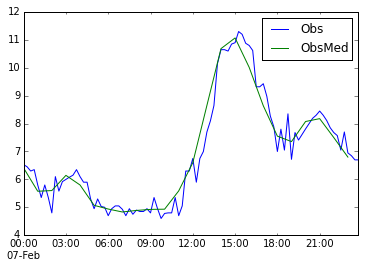

In [74]:
# вычисляем средние значения за час
for i in range(24):
    ObsM[ObsM.index.hour==i]=fof2.Obs[fof2.index.hour==i].mean()

fof2['Obs'].plot()
ObsM['ObsMed'].plot()
legend()

Выбор интервала времени из таблицы

In [25]:
fof2.between_time('06:45','07:45')


,Obs,IRTAM,IRI,DifIRTAM,DifIRI,Expand,DifExp,conf
2002-02-07 06:45:00,5.05,3.98,3.65,1.07,1.40,4.78,0.27,100
2002-02-07 07:00:00,4.93,3.94,3.59,0.99,1.34,4.81,0.12,42
2002-02-07 07:15:00,4.70,3.91,3.54,0.79,1.16,4.85,-0.15,100
2002-02-07 07:30:00,4.95,3.90,3.50,1.05,1.45,4.89,0.06,100
2002-02-07 07:45:00,4.75,3.91,3.49,0.84,1.26,4.93,-0.18,100


In [26]:
# вычисление среднего
mean(fof2['Obs'].between_time('06:45','07:45'))

4.8759999999999994

Выбор момента времени:

In [27]:
fof2.between_time('06:45','06:45') # start time = end time

,Obs,IRTAM,IRI,DifIRTAM,DifIRI,Expand,DifExp,conf
2002-02-07 06:45:00,5.05,3.98,3.65,1.07,1.4,4.78,0.27,100


In [28]:
# или 
fof2.at_time('6:45')

,Obs,IRTAM,IRI,DifIRTAM,DifIRI,Expand,DifExp,conf
2002-02-07 06:45:00,5.05,3.98,3.65,1.07,1.4,4.78,0.27,100
